# Set up

**https://colab.research.google.com/ - Create a notebook, pick
any publicly available ML data set (e.g. Spam Filtering Dataset) of
your choice and load it using the pandas library. Print the first few
lines of this data in the notebook.**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('/content/train-2.csv') 
print(data.head(10))

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000
5   6          50       RL  ...        WD         Normal    143000
6   7          20       RL  ...        WD         Normal    307000
7   8          60       RL  ...        WD         Normal    200000
8   9          50       RM  ...        WD        Abnorml    129900
9  10         190       RL  ...        WD         Normal    118000

[10 rows x 81 columns]


**Pick any categorical variable in the attributes of the data set and use
an appropriate pandas library to create dummy attributes that capture
the values of the categorical variable.**

In [6]:
data_dummy = pd.get_dummies(data)
data_dummy

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,...,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


**Pick any numeric attribute from the list of attributes and plot a
histogram of the values of the attribute in the data set. Use
Matplotlib library to do so.**

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


Text(0, 0.5, 'amount')

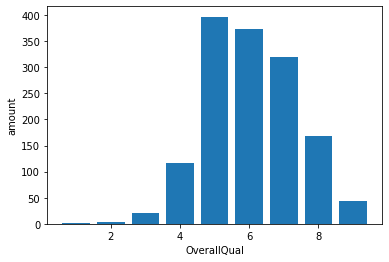

In [23]:
data_ov = data['OverallQual'].value_counts()
print(data_MS)
x_ov = []
y_ov = []
for i in range(10):
  if i > 0:
    x_ov.append(i)
    y_ov.append(data_ov[i])
plt.bar(x_ov,y_ov)
plt.xlabel("OverallQual")
plt.ylabel("amount")

# Housing Prices Data Set

In [ ]:
# read data
import pandas as pd
import numpy as np

df_test=pd.read_csv('/content/test.csv') 
print(df_test.head(10))

df_train = pd.read_csv('/content/train-2.csv')
print(df_train.head(10))

print("the number of data(test) attributes is :", len(df_test.iloc[0]))
print("the number of data(test) points is:", df_test.shape[0]*len(df_test.iloc[0]))

print("the number of data(train) attributes is :", len(df_train.iloc[0]))
print("the number of data(train) points is:", df_train.shape[0]*len(df_train.iloc[0]))

     Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal
5  1466          60       RL  ...    2010        WD        Normal
6  1467          20       RL  ...    2010        WD        Normal
7  1468          60       RL  ...    2010        WD        Normal
8  1469          20       RL  ...    2010        WD        Normal
9  1470          20       RL  ...    2010        WD        Normal

[10 rows x 80 columns]
   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD        

the number of data(test) attributes is : 80

the number of data(test) points is: 116720

the number of data(train) attributes is : 81

the number of data(train) points is: 118260

In [ ]:
# pre-progressing data
# dummy attributes
from sklearn import linear_model

df_train_dummy = pd.get_dummies(df_train , drop_first = True)

df_train_dummy = df_train_dummy.fillna(0)

df_test_dummy = pd.get_dummies(df_test , drop_first = True)

df_test_dummy = df_test_dummy.fillna(0)

df_train_dummy = df_train_dummy.astype(int)
df_test_dummy = df_test_dummy.astype(int)

#df_train_norm = (df_train_dummy - df_train_dummy.min()) / (df_train_dummy.max() - df_train_dummy.min())
##df_test_norm = (df_test_dummy - df_test_dummy.min()) / (df_test_dummy.max() - df_test_dummy.min())

In order to fit the linear regression model, I have added some dummy attributes instead of some non-numeric properties, such as MSZoning, LotShape, LandContour, etc.

Besides, I have I pad some NA data points with 0, and converted data type to integrate.

In [ ]:
# training linear regression model
df_linear_model = linear_model.LinearRegression()

X = df_train_dummy[['Id','MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 
                    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
                    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
                    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 
                    'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 
                    'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_FR2',
                    'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 
                    'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 
                    'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
                    'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 
                    'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
                    'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 
                    'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 
                     'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 
                    'HouseStyle_1Story',  'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
                    'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',  'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 
                    'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 
                    'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',  'Exterior1st_Stucco', 'Exterior1st_VinylSd', 
                    'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 
                    'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd',  'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd',
                    'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Fa', 
                    'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc', 
                    'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA',
                    'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 
                    'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ','BsmtFinType2_LwQ', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf',
                     'Heating_GasW', 'Heating_Grav',  'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 
                    'CentralAir_Y', 'Electrical_FuseF', 'Electrical_FuseP',  'Electrical_SBrkr', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2',
                    'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_Po', 'FireplaceQu_TA',
                    'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf',
                     'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P', 'PavedDrive_Y',
                     'PoolQC_Gd', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'MiscFeature_Othr', 'MiscFeature_Shed',  'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 
                    'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 
                    'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial']]
y = df_train_dummy['SalePrice']

df_linear_model.fit(X,y)

LinearRegression()

In [ ]:
#intercept
df_linear_model.intercept_

663592.2455745237

In [ ]:
#coefficient
df_linear_model.coef_

array([ 1.12362903e-01, -4.78756586e+01, -5.33080570e+01,  6.14224741e-01,
        7.77724192e+03,  5.54080032e+03,  2.41333466e+02,  6.65933968e+01,
        1.98979757e+01,  3.00217444e+00,  8.84644659e+00, -2.46289911e+00,
        9.38571309e+00,  1.51857192e+01,  3.23685129e+01, -2.19359691e+01,
        2.56183748e+01,  4.69335457e+03,  1.20239070e+03,  6.58034027e+03,
        1.33997637e+03, -2.83302228e+03, -1.20563712e+04,  2.23963092e+03,
        3.95424384e+03, -1.04741903e+01,  1.12518022e+04, -1.34304467e+00,
        1.74717727e+01,  3.19545335e+00,  1.06166373e+01,  4.11991936e+01,
        3.39405418e+01,  1.63570440e+02, -2.14377867e+00, -3.51875844e+02,
       -6.57245688e+02,  3.59232686e+04,  2.82632979e+04,  3.03180500e+04,
        2.66658391e+04,  2.91462486e+04,  1.57653546e+03,  5.81602558e+03,
       -1.93289767e+04,  2.13431188e+03,  1.63967548e+04,  3.20616642e+02,
        1.37062849e+04,  1.02670643e+04, -8.69291930e+03, -1.77593760e+04,
       -3.24797743e+02,  

In [ ]:
# output result
y_test = df_linear_model.predict(df_test_dummy)
y_test

array([102542.06712401, 121148.15288585, 178963.24374318, ...,
       168274.58581444, 110341.30533926, 225803.86400171])

In [ ]:
# R square
df_linear_model.score(X,y)

0.9116480841714847

$R^2$ is 0.911648, which is enough high to indicate that the model is great.

\
\
 **Do you see a difference in the value of the evaluation metric between
train and test data sets?**
\
\
\
Yes, I do. Some dummy attributes in train data set are not in test data set, which means some data points are different between train and test, including 

SalePrice,\
Utilities_NoSeWa,\
Condition2_RRAe,\
Condition2_RRAn,\
Condition2_RRNn,\
HouseStyle_2.5Fin,\
RoofMatl_CompShg,\
RoofMatl_Membran,\
RoofMatl_Metal,\
RoofMatl_Roll,\
Exterior1st_ImStucc,\
Exterior1st_Stone,\
Exterior2nd_Other,\
Heating_GasA,\
Heating_OthW,\
Electrical_Mix,\
GarageQual_Fa,\
PoolQC_Fa,\
MiscFeature_TenC.

**Would you suspect over-fitting and why?**
\
\
Yes, I would. Since there are three crucial characters which can decide a model is over-fitting or not:\
\
1.Model complexity, \
2.amount of training data, \
3.number of sample features.
\
\
Obviously, linear regression model is very simple and the amount of data is large enough to support the model training.\

However, the attributes is too many to ensure each of them can contribute to decide the 'SalePrice', for example, the attribute 'id' is unreasonable to be responsable to the final decision.The number of attributes in our model exceeds the size of the data set. Therefore, some attributes labels should be removed to solve the problem of over-fitting.

**L1 regularization**

In [ ]:
# L1 regularization
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV, LassoLars

#model = Lasso(alpha=0.01)
#model = LassoCV()
model = LassoLarsCV()
#model = LassoLars(alpha = 19.134001493525357)

model = model.fit(X,y)

In [ ]:
# alpha
model.alpha_

19.134001493525357

In [ ]:
# coefficient
print(model.coef_)

[ 0.00000000e+00 -1.24665092e+02  0.00000000e+00  3.15457908e-01
  1.08587270e+04  4.62110022e+03  2.50509466e+02  1.16207717e+02
  1.80578157e+01  7.19561142e+00  0.00000000e+00  0.00000000e+00
  7.61690875e+00  0.00000000e+00  0.00000000e+00 -1.86239171e+01
  4.56687638e+01  4.88851119e+03  0.00000000e+00  3.84664950e+03
  0.00000000e+00 -1.17062708e+03 -9.41112014e+03  1.63481877e+03
  3.41446903e+03 -7.51433540e-01  9.14974184e+03  7.44764197e-01
  1.69382243e+01  1.98444012e+00  0.00000000e+00  3.59028720e-01
  2.60259007e+01  9.67258905e+01  0.00000000e+00 -6.33247739e+01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.61183358e+03  1.22775357e+04  0.00000000e+00  4.24497830e+03
 -1.51575563e+04  0.00000000e+00  5.13576251e+03  0.00000000e+00
  3.35536780e+03  9.26192165e+03 -1.00309057e+03 -4.68314701e+03
  0.00000000e+00  1.61111459e+03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.68776501e+03  0.00000000e+00  0.00000000e+00
  1.95518317e+04 -4.89650

In [ ]:
# intercept
print(model.intercept_)

-751036.8859936179


In [ ]:
# test
model.predict(df_test_dummy)

array([107699.28615763, 156370.20623463, 176743.40065668, ...,
       173496.03539706, 109417.8655366 , 226308.0973582 ])

In [ ]:
# alphas
alphas = model.alphas_
alphas

array([1643.97076387, 1223.39678953,  783.49463315,  757.5975043 ,
        658.26319508,  554.45041036,  387.24198632,  379.21310011,
        363.5755427 ,  337.38026633,  301.74342617,  288.3100321 ,
        282.75157867,  253.51958997,  244.34539106,  240.51260126,
        233.36105757,  201.66781651,  200.41496806,  196.58579928,
        187.87443247,  180.60256064,  178.08848027,  170.97598536,
        151.77726192,  131.14149816,  130.16140029,  121.19417347,
        113.65510292,  107.56687886,  105.96483817,   96.96838541,
         95.62275908,   91.53370925,   86.68938184,   86.47865607,
         84.37735022,   83.91664962,   74.35474083,   65.32680247,
         65.21837051,   65.06600022,   61.55468065,   61.40411516,
         61.01617876,   60.05467951,   56.59387812,   55.42778459,
         54.60540264,   52.90042422,   52.88199891,   52.1430569 ,
         49.42690049,   48.57537435,   48.27987106,   47.61916918,
         47.27626477,   45.27045563,   42.64072462,   40.96790

**validation**

In [ ]:
df_validation_dummy = df_train_dummy.iloc[1361:1460]

X_validation = df_validation_dummy[['Id','MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 
                    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
                    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
                    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 
                    'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 
                    'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_FR2',
                    'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 
                    'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 
                    'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
                    'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 
                    'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
                    'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 
                    'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 
                     'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 
                    'HouseStyle_1Story',  'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
                    'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',  'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 
                    'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 
                    'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',  'Exterior1st_Stucco', 'Exterior1st_VinylSd', 
                    'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 
                    'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd',  'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd',
                    'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Fa', 
                    'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc', 
                    'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA',
                    'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 
                    'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ','BsmtFinType2_LwQ', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf',
                     'Heating_GasW', 'Heating_Grav',  'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 
                    'CentralAir_Y', 'Electrical_FuseF', 'Electrical_FuseP',  'Electrical_SBrkr', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2',
                    'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_Po', 'FireplaceQu_TA',
                    'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf',
                     'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P', 'PavedDrive_Y',
                     'PoolQC_Gd', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'MiscFeature_Othr', 'MiscFeature_Shed',  'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 
                    'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 
                    'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial']]
y_validation = df_validation_dummy['SalePrice']

y_predict = model.predict(X_validation)

print(y_predict)
print(y_validation)

[276514.56400145 110688.10365789 180157.85758058 147804.50359532
 209722.81433062 205936.43498097 132827.72556845 140526.50864997
 238830.70181038 104466.0171323  177000.58546635 237576.45004696
 427430.44426806 239684.89492561 260993.4644313   97393.52038056
 132286.28965332  93493.59168605 145620.605095    46136.74203025
 233565.58733595 172990.1446453  147954.09784022 119045.89172259
 116734.82545703 304706.06539132 169913.30949738 330362.87239579
 136777.99852661 218516.36660029 130749.85938059 116264.34693436
 157228.01660296 228199.18423583 282941.93395434 167432.87796742
 140026.38767581 139715.3037529  153173.2134098  119954.74366659
 197357.08683119 201391.05268808 265195.56354768  83685.13915448
 283531.0643228  128239.62314816 109241.20685937 115508.96175171
 217454.95748566 208583.6239728  154085.12773071  99764.56707046
 248777.36715775 179553.45855698 201634.41235261 124892.09381534
 324069.9845399  120991.19840687 231829.85531102 164261.55699988
 127535.18411449 138972.6

In [ ]:
validation_error = 1-abs((y_validation-y_predict)/y_validation)
print(validation_error)

1361    0.936482
1362    0.944823
1363    0.852000
1364    0.974662
1365    0.970939
          ...   
1455    0.982859
1456    0.999994
1457    0.956913
1458    0.983786
1459    0.968277
Name: SalePrice, Length: 99, dtype: float64


**Plot validation error as a function of the regularization hyper-parameter**

In [ ]:
y_plot = []
for i in alphas:
  model_plot = LassoLars(i)
  model_plot = model_plot.fit(X, y)
  y_predict_plot= model_plot.predict(X_validation)
  validation_error_plot = 1-abs((y_validation-y_predict_plot)/y_validation)
  validation_error_plot = validation_error_plot.tolist()
  validation_error_plot = sum(validation_error_plot)/99
  y_plot.append(validation_error_plot)

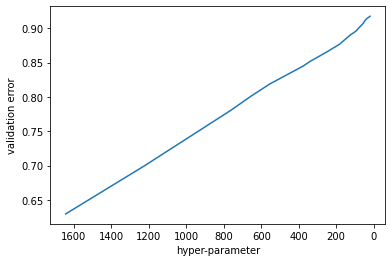

In [ ]:
import matplotlib.pyplot as plt

aw = plt.gca()
aw.invert_xaxis()
aw = plt.plot(alphas,y_plot)
plt.xlabel('hyper-parameter')
plt.ylabel('validation error')
plt.show()

hyper-parameter value:**19.13400149**   gives me the lowest error

 **Based on the linear model you just learned, print the 10 most
important attributes/features that seem to have a big impact on the
prediction of the sale price? Do the important attributes make sense
and match your intuition/knowledge on housing prices?**

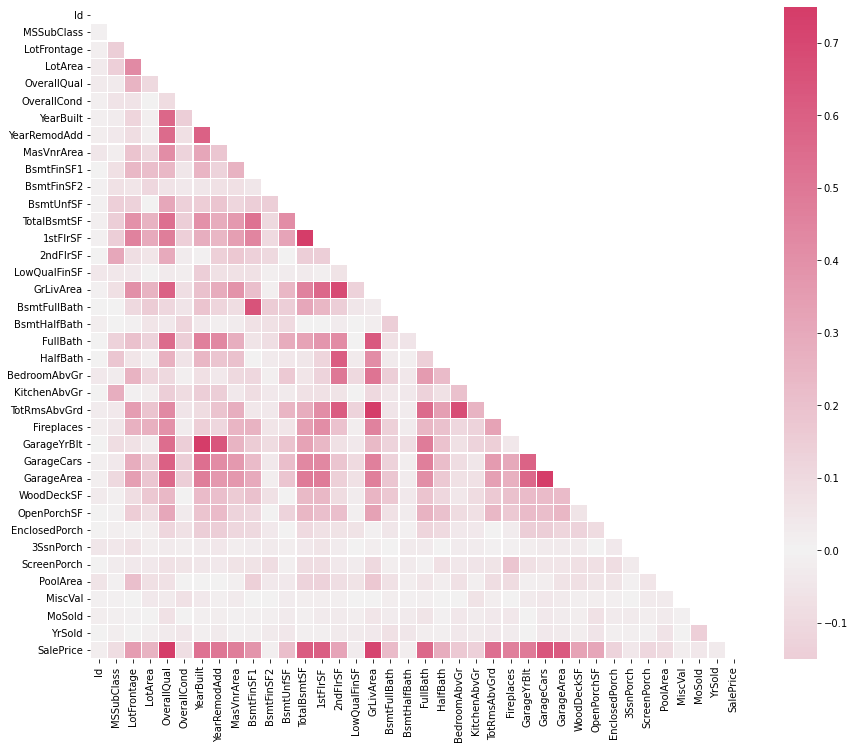

In [ ]:
import seaborn as sns

train_matrix = df_train.select_dtypes(exclude="object").corr()
train_mask = np.triu(np.ones_like(matrix, dtype=bool))
cmap = sns.diverging_palette(359, 0, s=75, n=20, as_cmap=True, center="light")
plt.figure(figsize=(15, 12))
sns.heatmap(matrix, mask = train_mask, annot=False, cmap=cmap, square=True, fmt='.2f',linewidth=.2, center=0, vmin=-0.15, vmax=0.75)
plt.show()

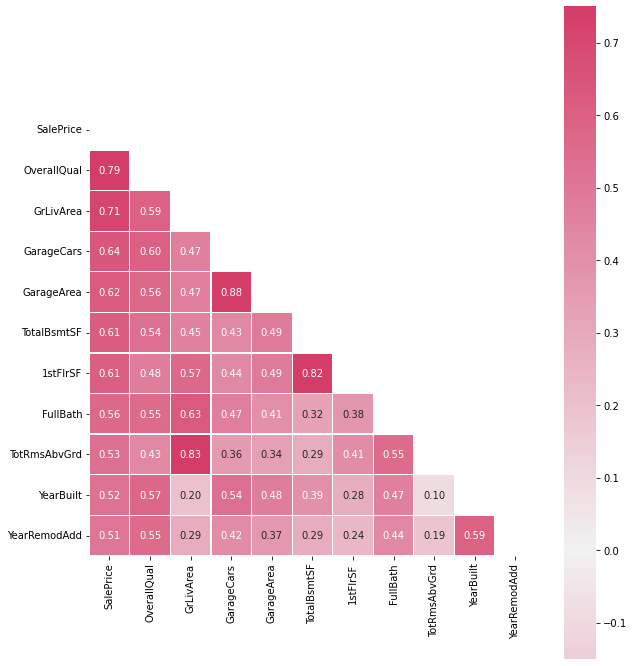

the 10 most important attributes : ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


In [ ]:
# Pick top 10 features that highly corelated to SalePrice
k = 11 #number of variables for heatmap
col_names = train_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
coef_matrix = np.corrcoef(df_train[col_names].values.T)
mask = np.triu(np.ones_like(coef_matrix, dtype=bool))
cmap = sns.diverging_palette(359,0, s=75, n=20, as_cmap=True, center="light")
plt.figure(figsize=(10, 12))
sns.heatmap(coef_matrix, cbar=True, mask = mask, annot=True, cmap=cmap, square=True, fmt='.2f',linewidth=.2, center=0, vmin=-0.15, vmax=0.75, yticklabels=col_names.values, xticklabels=col_names.values)
plt.show()

col_names = col_names.tolist()
col_names.pop(0)
print('the 10 most important attributes :',col_names)

I think the results I get are in line with my everyday cognition. For example, some attributes: OverallQual, GrLivArea, in my opinion, are important indicators to evaluate whether a house is livable.

